# Úspešnosť študentov v skúškach - writing score

In [1]:
# Importovanie potrebných knižníc pre prácu s dátami

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import datasetu

data = pd.read_csv('StudentsPerformance (1).csv',index_col=None)

In [3]:
# Zobrazenie prvých 5 riadkov

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Zobrazenie počtu riadkov a počtu stĺpcov

data.shape

(1000, 8)

# Štatistiky o údajoch

In [5]:
# Zobrazenie základných štatistík 

premenna = data.describe()
premenna.transpose() # Transponovanie sledovaných charakteristík do stĺpcov

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Zistenie počtu žien a počtu mužov

data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

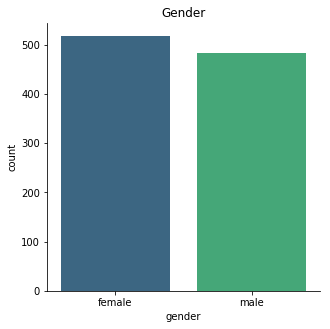

In [8]:
# Graf znázorňujúci počet žien a mužov

sns.catplot(x='gender',kind='count',data=data,height=4.5,palette='viridis')
plt.title('Gender')

In [9]:
# Konvertovanie dát na číselné hodnoty, aby mohli byť použité v procese trénovania predikcie modelu - takto budeme pokračovať aj pri "race/ethnicity", "lunch", "test preparation course" a "parental level of education"
data['gender'].replace({'male':'0','female':'1'},inplace=True)

In [10]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

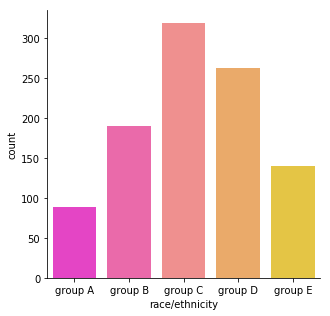

In [11]:
data["race/ethnicity"].sort_values()
sns.catplot(x='race/ethnicity',kind='count',data=data,height=4.5,palette='spring',
            order=['group A','group B','group C','group D','group E'])

In [12]:
data['race/ethnicity'].replace({'group A':'1','group B':'2', 'group C':'3',
                               'group D':'4','group E':'5'},inplace=True)

In [13]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

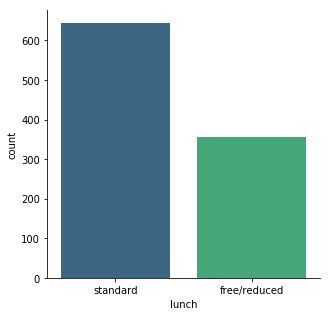

In [14]:
sns.catplot(x='lunch',kind='count',data=data,height=4.5,palette='viridis')

In [15]:
data['lunch'].replace({'free/reduced':'0','standard':'1'},inplace=True)

In [16]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

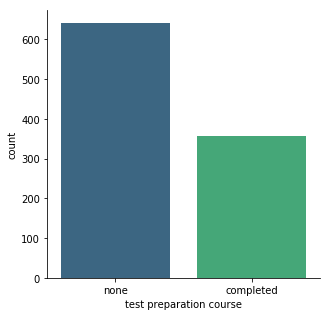

In [17]:
sns.catplot(x='test preparation course',kind='count',data=data,height=4.5,palette='viridis')

In [18]:
data['test preparation course'].replace({'none':'0','completed':'1'},inplace=True)

In [19]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

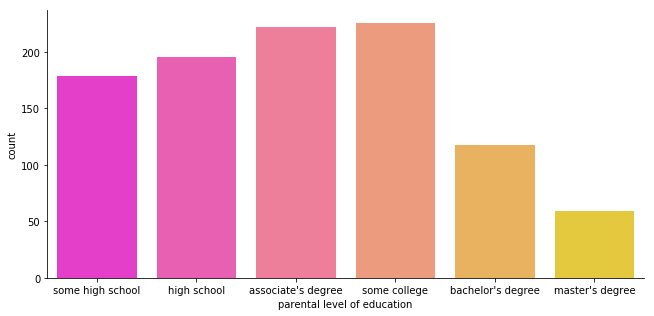

In [20]:
data["race/ethnicity"].sort_values()
sns.catplot(x='parental level of education',kind='count',data=data,height=4.5,aspect=2,palette='spring',
            order=["some high school","high school","associate's degree","some college",
                   "bachelor's degree","master's degree"],)

In [21]:
data['parental level of education'].replace({'some high school':'1','high school':'1',"associate's degree":'2',
                                        'some college':'3',"bachelor's degree":'4',"master's degree":'5'},inplace=True)

In [22]:
# Po konvertovaní dát na numerické dáta si opäť zobrazíme prvých 5 riadkov 

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,4,1,0,72,72,74
1,1,3,3,1,1,69,90,88
2,1,2,5,1,0,90,95,93
3,0,1,2,0,0,47,57,44
4,0,3,3,1,0,76,78,75


Teraz, keď všetky naše polia sú numerické, môžeme urobiť prieskumnú analýzu dát

# Prieskumná analýza dát


Text(0.5, 1.0, 'Writing Score by Test Preparation Course')

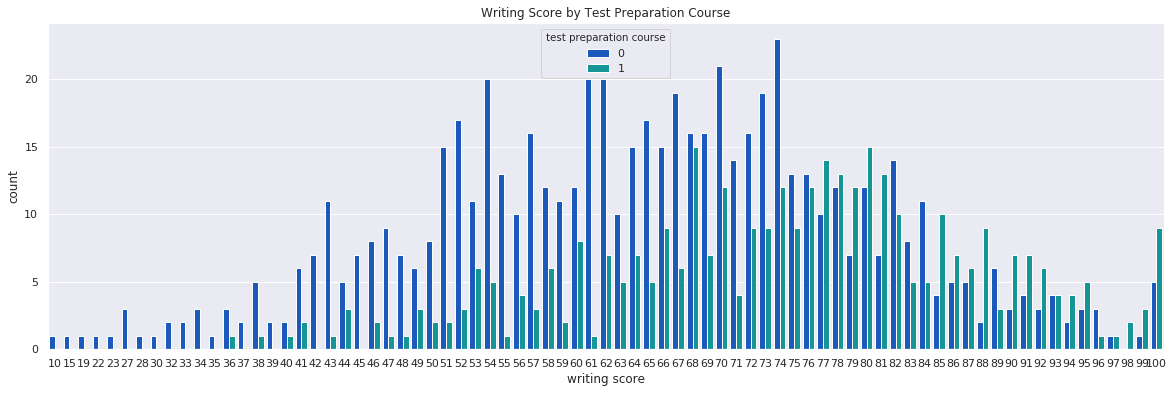

In [23]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x='writing score', hue='test preparation course',data=data, palette='winter')
plt.title('Writing Score by Test Preparation Course')

Z tohto grafu môžeme vidieť, že väčšina študentov, ktorí získali vysoké skóre, študujú na prípravnom kurze - z toho vyplýva, že prípravný kurz pomáha študentom pri výslednom writing score 

# Lineárna regresia
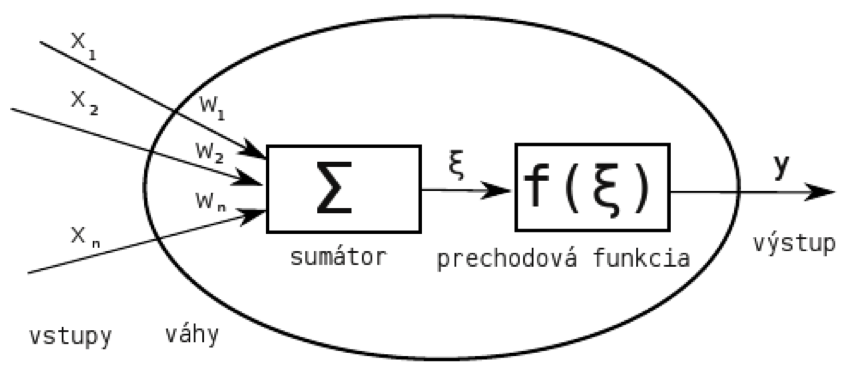

Na natrénovanie modelu lineárnej regresie potrebujeme ako prvé rozdeliť atribúty datasetu na dve množiny. X bude obsahovať črty, na ktorých model natrénujeme, nezávislé premenné, y bude predstavovať pole s cieľovou, závislou premennou. V tomto prípade to bude atribút writing score. Cieľom je na základe dát predpovedať writing score (výslednú známku)

In [24]:
X = data[['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score']]
y = data['writing score']

Dáta rozdelíme na trénovaciu a testovaciu množinu. Model natrénujeme na trénovacej množine a následne ho overíme na testovacej množine.
Použijeme knižnicu sklearn, ktorú nenačítame celú, ale len potrebné moduly, resp. metódy

Údaje rozdelíme na 4 časti:

X_train - nezávislé premenné trénovacej mnoožiny

x_test - nezávislá premenná testovacej množiny

y_train - závislá premenná trénovacej množiny

y_test - závislá premenná testovacej množiny

In [25]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
# Implementácia modelu lineárnej regresie pomocou scikit-learn a K-fold pre stabilný model

from sklearn.linear_model import LinearRegression
kfold = model_selection.KFold(n_splits=10)  # metóda definujúca počet záhybov (10)
lr = LinearRegression() # vytvorenie inštancie triedy LinearRegression, ktorá bude reprezentovať regresný model
scoring = 'r2' # koeficient stanovenia
results = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring=scoring)  # vyhodnotenie výsledku krížovou validáciou
lr.fit(X_train,y_train)  # natrénujeme model s využitím dát trénovacej množiny
lr_predictions = lr.predict(X_test) # získanie predpovedanej odpovede
print('Coefficients: \n', lr.coef_)
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])  # vypočítanie koeficientu dataframe-u
coeff_df


Coefficients: 
 [5.95049708 0.04366275 0.74545503 0.38447942 3.4540494  0.28792814
 0.66391988]


,Coefficient
gender,5.950497
race/ethnicity,0.043663
parental level of education,0.745455
lunch,0.384479
test preparation course,3.454049
math score,0.287928
reading score,0.663920


# Metriky pre evalváciu modelu lineárnej regresie

V praxi sa používajú nasledujúce tri evalvačné metriky úlohy predikcie:

   Mean Absolute Error (MAE) predstavuje priemer absolútnych hodnôt odchýlok: 
                    1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|


   Mean Squared Error (MSE) je priemerom štvorca odchýlok:
                    1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2
   

   Root Mean Squared Error (RMSE) predstavuje odmocninu zo štvorca odchýlok:
                odmocnina z 1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2
        

Ak tieto metriky navzájom porovnáme, môžeme konštatovať:
MAE je najjednoduchšia na porozumenie, pretože predstavuje priemernú odchýlku.
MSE je populárnejšia ako MAE, pretože "trestá" väčšie odchýlky, ktoré majú vplyv na model.
RMSE je najpopulárnejšia, pretože je interpretovateľná v jednotkách nezávislej, skúmanej premennej (y).
Vo všetkých prípadoch sa však snažíme nájsť ich mininum.

In [27]:
# Zobrazenie jednotlivých metrík

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

MAE: 2.7384714047455985
MSE: 12.249445163960624
RMSE: 3.4999207368111387


Testovanie modelu

In [28]:
from sklearn.metrics import r2_score
print("R_square score: ", r2_score(y_test,lr_predictions))  # výpis koeficientu stanovenia (determinácie)

R_square score:  0.9414058645497101


# Rozhodovacie stromy

In [29]:
from sklearn.tree import DecisionTreeRegressor  # import knižnice


dtr = DecisionTreeRegressor(random_state = 42)  # train_test_split rozdelí matice na náhodné testovacie a trénovacie dáta. Ak zadefinujeme random state=42, tak zakaždým prvý raz keď sa rozdeľuje, dostaneme rovnaké výsledky. To je dobré v prípade, ak potrebujeme reprodukovateľné dáta
dtr.fit(X_train,y_train)
dtr_predictions = dtr.predict(X_test) 
print("R_square score: ", r2_score(y_test,dtr_predictions))

R_square score:  0.8605476134391326


# Porovnanie modelov

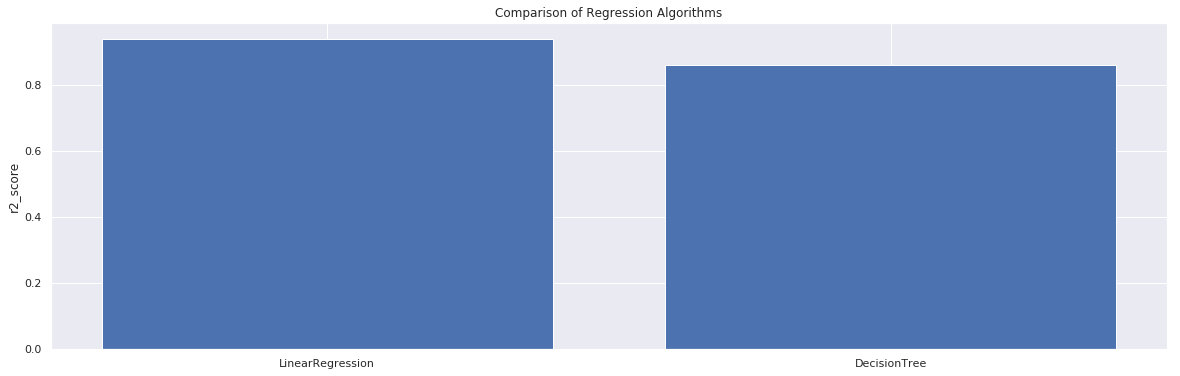

In [30]:
x = ["LinearRegression","DecisionTree"]
y = np.array([r2_score(y_test,lr_predictions),r2_score(y_test,dtr_predictions)])
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()

Lineárna regresia má vyššie R ^ 2 skóre.